In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from prophet import Prophet


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
#vehicle revenue miles (VRM)
df = pd.read_excel('May 2023 Complete Monthly Ridership (with adjustments and estimates).xlsx', sheet_name='VRM')

df.head()

,NTD ID,Legacy NTD ID,Agency,Status,Reporter Type,UZA,UACE CD,UZA Name,Mode,TOS,3 Mode,1/2002,2/2002,3/2002,4/2002,5/2002,6/2002,7/2002,8/2002,9/2002,10/2002,11/2002,12/2002,1/2003,2/2003,3/2003,4/2003,5/2003,6/2003,7/2003,8/2003,9/2003,10/2003,11/2003,12/2003,1/2004,2/2004,3/2004,4/2004,5/2004,6/2004,7/2004,8/2004,9/2004,10/2004,11/2004,12/2004,1/2005,2/2005,3/2005,4/2005,5/2005,6/2005,7/2005,8/2005,9/2005,10/2005,11/2005,12/2005,1/2006,2/2006,3/2006,4/2006,5/2006,6/2006,7/2006,8/2006,9/2006,10/2006,11/2006,12/2006,1/2007,2/2007,3/2007,4/2007,5/2007,6/2007,7/2007,8/2007,9/2007,10/2007,11/2007,12/2007,1/2008,2/2008,3/2008,4/2008,5/2008,6/2008,7/2008,8/2008,9/2008,10/2008,11/2008,12/2008,1/2009,2/2009,3/2009,4/2009,5/2009,6/2009,7/2009,8/2009,9/2009,10/2009,11/2009,12/2009,1/2010,2/2010,3/2010,4/2010,5/2010,6/2010,7/2010,8/2010,9/2010,10/2010,11/2010,12/2010,1/2011,2/2011,3/2011,4/2011,5/2011,6/2011,7/2011,8/2011,9/2011,10/2011,11/2011,12/2011,1/2012,2/2012,3/2012,4/2012,5/2012,6/2012,7/2012,8/2012,9/2012,10/2012,11/2012,12/2012,1/2013,2/2013,3/2013,4/2013,5/2013,6/2013,7/2013,8/2013,9/2013,10/2013,11/2013,12/2013,1/2014,2/2014,3/2014,4/2014,5/2014,6/2014,7/2014,8/2014,9/2014,10/2014,11/2014,12/2014,1/2015,2/2015,3/2015,4/2015,5/2015,6/2015,7/2015,8/2015,9/2015,10/2015,11/2015,12/2015,1/2016,2/2016,3/2016,4/2016,5/2016,6/2016,7/2016,8/2016,9/2016,10/2016,11/2016,12/2016,1/2017,2/2017,3/2017,4/2017,5/2017,6/2017,7/2017,8/2017,9/2017,10/2017,11/2017,12/2017,1/2018,2/2018,3/2018,4/2018,5/2018,6/2018,7/2018,8/2018,9/2018,10/2018,11/2018,12/2018,1/2019,2/2019,3/2019,4/2019,5/2019,6/2019,7/2019,8/2019,9/2019,10/2019,11/2019,12/2019,1/2020,2/2020,3/2020,4/2020,5/2020,6/2020,7/2020,8/2020,9/2020,10/2020,11/2020,12/2020,1/2021,2/2021,3/2021,4/2021,5/2021,6/2021,7/2021,8/2021,9/2021,10/2021,11/2021,12/2021,1/2022,2/2022,3/2022,4/2022,5/2022,6/2022,7/2022,8/2022,9/2022,10/2022,11/2022,12/2022,1/2023,2/2023,3/2023,4/2023,5/2023
0,1.0,0001,King County Department of Metro Transit,Active,Full Reporter: Operating,14.0,80389.0,"Seattle--Tacoma, WA",DR,PT,Bus,746158.0,656324.0,726578.0,736975.0,746158.0,696633.0,746158.0,747339.0,695451.0,766920.0,696633.0,725396.0,761210.0,697454.0,777948.0,795216.0,787912.0,748855.0,793074.0,754939.0,752394.0,843825.0,701931.0,728026.0,747628.0,771845.0,883913.0,857232.0,841169.0,847193.0,825119.0,820359.0,806457.0,829771.0,895134.0,905623.0,774351.0,753949.0,848372.0,821603.0,886438.0,862034.0,843133.0,905209.0,845207.0,865101.0,812467.0,797799.0,798647.0,754978.0,870726.0,811068.0,869933.0,862697.0,864720.0,940351.0,882333.0,895883.0,765935.0,728139.0,789831.0,782401.0,872267.0,864049.0,963309.0,846949.0,848425.0,891059.0,799670.0,921386.0,829419.0,820341.0,746766.0,735504.0,760462.0,797155.0,794368.0,749376.0,793643.0,750790.0,745579.0,848123.0,714143.0,737948.0,841743.0,774171.0,853798.0,851673.0,816168.0,828250.0,855102.0,832296.0,832413.0,897303.0,782787.0,809271.0,778833.0,753302.0,867834.0,836731.0,808656.0,810494.0,812026.0,824703.0,816410.0,878178.0,763045.0,816721.0,835425.0,780800.0,922064.0,863560.0,877355.0,858632.0,807759.0,866152.0,821033.0,849680.0,800887.0,752367.0,708973.0,814776.0,867424.0,833241.0,882908.0,809746.0,812980.0,851610.0,767559.0,873579.0,794750.0,741422.0,823920.0,778181.0,832695.0,854336.0,872258.0,788483.0,825955.0,819781.0,760267.0,862747.0,745981.0,705354.0,768910.0,688770.0,748916.0,781409.0,761544.0,714233.0,726415.0,702592.0,693406.0,776224.0,654371.0,658414.0,585118.0,558914.0,599948.0,587702.0,574770.0,569771.0,562844.0,547513.0,528987.0,571210.0,502916.0,515948.0,628731.0,657129.0,706423.0,686973.0,681681.0,668495.0,633077.0,695930.0,655110.0,681981.0,641698.0,596968.0,635089.0,578776.0,701185.0,657496.0,693832.0,662008.0,632230.0,682834.0,613870.0,689045.0,644004.0,611734.0,695625.0,634643.0,707393.0,699070.0,735695.0,686858.0,696654.0,734015.0,649497.0,753757.0,686471.0,656197.0,722368.0,503211.0,718918.0,741892.0,760626.0,702880.0,749261.0,751070.0,702267.0,789753

In [6]:
col = df.columns.to_list()
id_list = col[:11]
value_list = col[11:]

In [7]:
data = (df.melt(id_vars=id_list,
                value_vars =value_list,var_name ='Date',value_name="Total")
 .replace('', np.nan,)
 .dropna()
)

data.head()

,NTD ID,Legacy NTD ID,Agency,Status,Reporter Type,UZA,UACE CD,UZA Name,Mode,TOS,3 Mode,Date,Total
0,1.0,0001,King County Department of Metro Transit,Active,Full Reporter: Operating,14.0,80389.0,"Seattle--Tacoma, WA",DR,PT,Bus,1/2002,746158.0
1,1.0,0001,King County Department of Metro Transit,Active,Full Reporter: Operating,14.0,80389.0,"Seattle--Tacoma, WA",DR,TN,Bus,1/2002,0.0
2,1.0,0001,King County Department of Metro Transit,Active,Full Reporter: Operating,14.0,80389.0,"Seattle--Tacoma, WA",DR,TX,Bus,1/2002,0.0
3,1.0,0001,King County Department of Metro Transit,Active,Full Reporter: Operating,14.0,80389.0,"Seattle--Tacoma, WA",FB,DO,Ferry,1/2002,0.0
4,1.0,0001,King County Department of Metro Transit,Active,Full Reporter: Operating,14.0,80389.0,"Seattle--Tacoma, WA",LR,DO,Rail,1/2002,2655.0


In [8]:
metro_lr = data.loc[(data['Agency'] == 'Los Angeles County Metropolitan Transportation Authority ')&(data['Mode']=='LR')]
metro_lr['Date'] = pd.to_datetime(metro_lr['Date'], format='%m/%Y')

C:\Users\cindy\AppData\Local\Temp\ipykernel_17120\2055725215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metro_lr['Date'] = pd.to_datetime(metro_lr['Date'], format='%m/%Y')


In [9]:
df2 = metro_lr[['Date','Total']].copy().reset_index(drop=True)
df2.head()

,Date,Total
0,2002-01-01,483718.0
1,2002-02-01,457688.0
2,2002-03-01,543135.0
3,2002-04-01,545845.0
4,2002-05-01,587328.0


In [11]:
df2.columns = ['ds', 'y']
df2

,ds,y
0,2002-01-01,483718.0
1,2002-02-01,457688.0
2,2002-03-01,543135.0
3,2002-04-01,545845.0
4,2002-05-01,587328.0
...,...,...
252,2023-01-01,1197372.0
253,2023-02-01,1082584.0
254,2023-03-01,1204883.0
255,2023-04-01,1251593.0


#### Train Model

In [12]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df2)

18:21:47 - cmdstanpy - INFO - Chain [1] start processing
18:21:47 - cmdstanpy - INFO - Chain [1] done processing


#### Forecast

In [13]:
future = m.make_future_dataframe(periods=12,freq='M')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2002-01-01,497319.119643,402809.797966,754615.605239,497319.119643,497319.119643,78470.846960,78470.846960,78470.846960,57579.461449,57579.461449,57579.461449,20891.385511,20891.385511,20891.385511,0.0,0.0,0.0,575789.966603
1,2002-02-01,500080.813922,285199.672559,675610.866286,500080.813922,500080.813922,-20630.725645,-20630.725645,-20630.725645,57579.461449,57579.461449,57579.461449,-78210.187094,-78210.187094,-78210.187094,0.0,0.0,0.0,479450.088277
2,2002-03-01,502575.247464,369370.557605,729775.481097,502575.247464,502575.247464,54153.741705,54153.741705,54153.741705,57579.461449,57579.461449,57579.461449,-3425.719744,-3425.719744,-3425.719744,0.0,0.0,0.0,556728.989169
3,2002-04-01,505336.941742,355843.805913,715569.532458,505336.941742,505336.941742,37580.919780,37580.919780,37580.919780,57579.461449,57579.461449,57579.461449,-19998.541669,-19998.541669,-19998.541669,0.0,0.0,0.0,542917.861522
4,2002-05-01,508009.549109,400777.103150,754754.718945,508009.549109,508009.549109,69653.539787,69653.539787,69653.539787,57579.461449,57579.461449,57579.461449,12074.078338,12074.078338,12074.078338,0.0,0.0,0.0,577663.088896


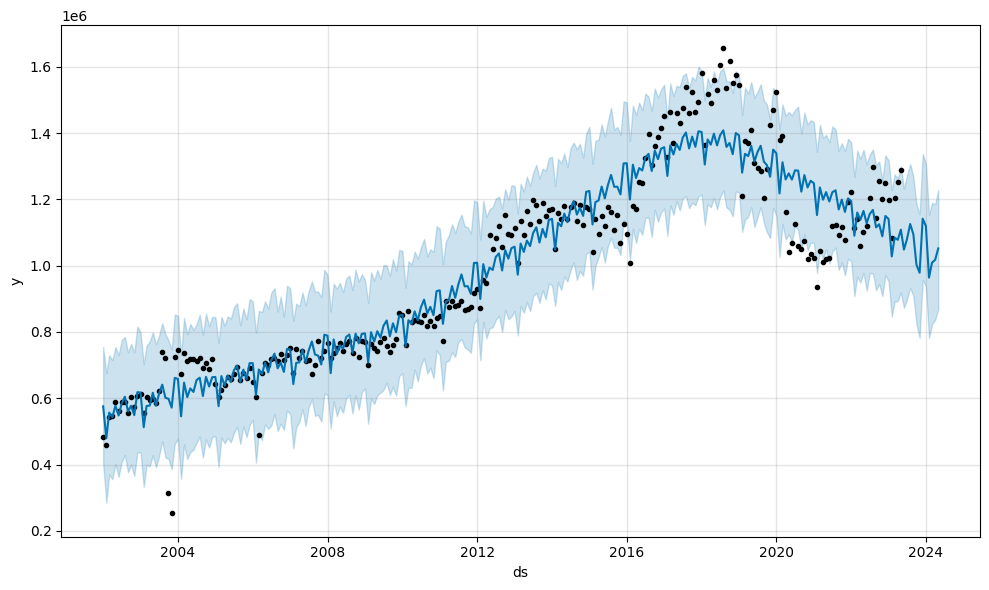

In [14]:
plot1 = m.plot(forecast)

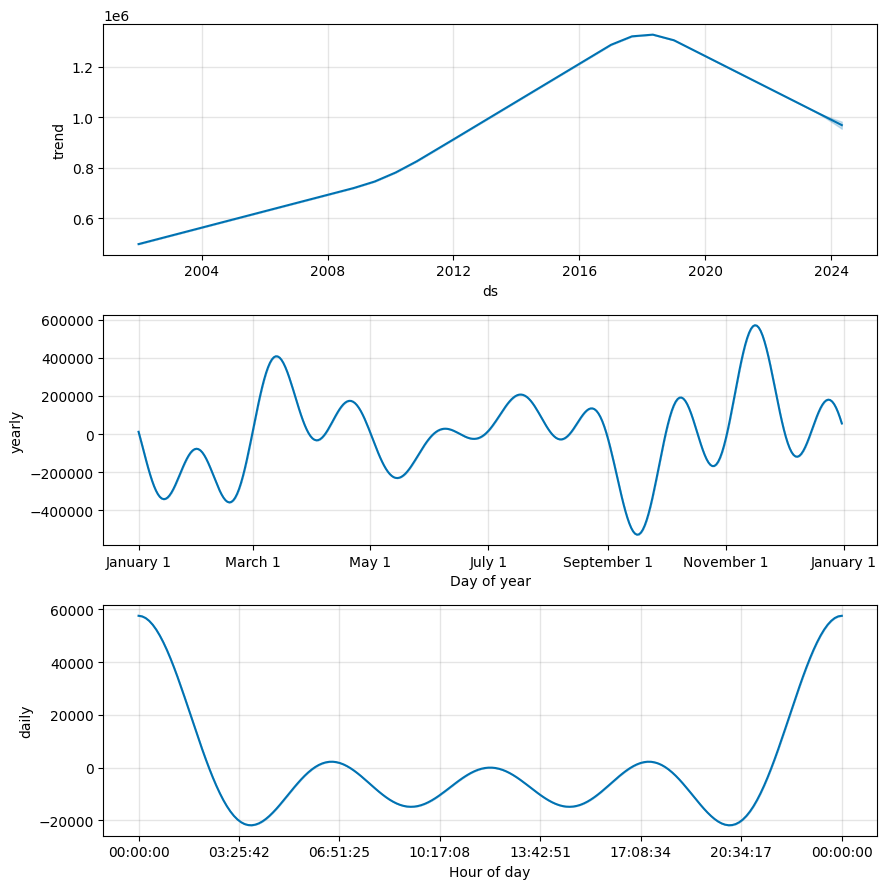

In [15]:
plt2 = m.plot_components(forecast)